In [0]:
import numpy as np
import random
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import os

from cleaning import *
from data_loader import *
from extractNet_connected import *
from helper import *
from metrics import *
from trainer import *
from visualizer import *

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip

In [0]:
!wget https://github.com/MNRKhan/aps360-project/raw/master/datasets/data.zip

--2019-03-21 21:54:01--  https://github.com/MNRKhan/aps360-project/raw/master/datasets/data.zip
Resolving github.com (github.com)... 192.30.253.113, 192.30.253.112
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data.zip [following]
--2019-03-21 21:54:03--  https://raw.githubusercontent.com/MNRKhan/aps360-project/master/datasets/data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9812038 (9.4M) [application/zip]
Saving to: ‘data.zip’

data.zip            100%[===================>]   9.36M  --.-KB/s    in 0.1s    

2019-03-21 21:54:04 (66.0 MB/s) - ‘data.zip’ saved [9812038/9812038]



In [0]:
!unzip data.zip

Archive:  data.zip
   creating: data/
   creating: data/images/
  inflating: data/images/63.jpg      
  inflating: data/images/189.jpg     
  inflating: data/images/77.jpg      
  inflating: data/images/638.jpg     
  inflating: data/images/604.jpg     
  inflating: data/images/162.jpg     
  inflating: data/images/176.jpg     
  inflating: data/images/88.jpg      
  inflating: data/images/610.jpg     
  inflating: data/images/348.jpg     
  inflating: data/images/360.jpg     
  inflating: data/images/406.jpg     
  inflating: data/images/412.jpg     
  inflating: data/images/374.jpg     
  inflating: data/images/599.jpg     
  inflating: data/images/228.jpg     
  inflating: data/images/214.jpg     
  inflating: data/images/572.jpg     
  inflating: data/images/566.jpg     
  inflating: data/images/200.jpg     
  inflating: data/images/758.jpg     
  inflating: data/images/770.jpg     
  inflating: data/images/764.jpg     
  inflating: data/images/765.jpg     
  inflating: data/images

In [0]:
!rm -rf __MACOSX
!rm -rf *.zip
!rm -rf data_loader.py

In [0]:
# Set random seeds
torch.manual_seed(360)
np.random.seed(360)
random.seed(360)

# Form dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageMaskDataset("/content/data", transform)

# Dataset sizes
size = len(dataset)

train_size = int(0.6 * size)
valid_size = int(0.2 * size)
test_size = size - train_size - valid_size

# Splitting datasets
train_data, valid_data, test_data = torch.utils.data.random_split(dataset, [train_size, valid_size, test_size])

# Making dataloader
train = DataLoader(train_data, batch_size=2, shuffle=True, num_workers=1)
valid = DataLoader(valid_data, batch_size=2, shuffle=True, num_workers=1)

In [0]:
net = extractNet_connected()

Epoch:0, Train IoU:0.3987, Train Loss:0.3468|Valid IoU:0.3965, Valid Loss:0.3467
Epoch:1, Train IoU:0.4039, Train Loss:0.3451|Valid IoU:0.3995, Valid Loss:0.3454
Epoch:2, Train IoU:0.4171, Train Loss:0.3429|Valid IoU:0.4102, Valid Loss:0.3438
Epoch:3, Train IoU:0.4344, Train Loss:0.3395|Valid IoU:0.4245, Valid Loss:0.3412
Epoch:4, Train IoU:0.4280, Train Loss:0.3423|Valid IoU:0.4213, Valid Loss:0.3435
Epoch:5, Train IoU:0.4108, Train Loss:0.3372|Valid IoU:0.3955, Valid Loss:0.3403
Epoch:6, Train IoU:0.3513, Train Loss:0.3392|Valid IoU:0.3438, Valid Loss:0.3408
Epoch:7, Train IoU:0.4589, Train Loss:0.3397|Valid IoU:0.4470, Valid Loss:0.3423
Epoch:8, Train IoU:0.4586, Train Loss:0.3358|Valid IoU:0.4449, Valid Loss:0.3384
Epoch:9, Train IoU:0.4813, Train Loss:0.3413|Valid IoU:0.4694, Valid Loss:0.3436
Epoch:10, Train IoU:0.4658, Train Loss:0.3341|Valid IoU:0.4473, Valid Loss:0.3375
Epoch:11, Train IoU:0.4630, Train Loss:0.3370|Valid IoU:0.4481, Valid Loss:0.3407
Epoch:12, Train IoU:0.4492

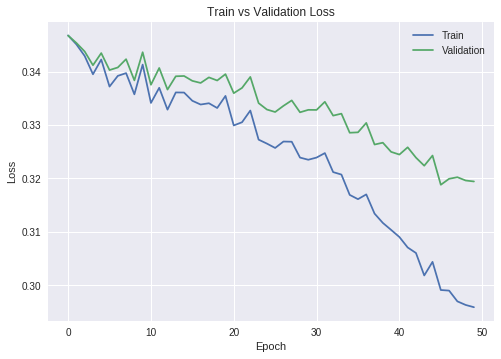

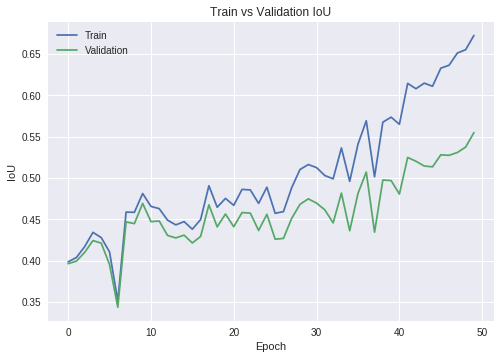

In [0]:
trainModel(net, train, valid, batch_size=2, num_epochs=50, checkpoint=False)

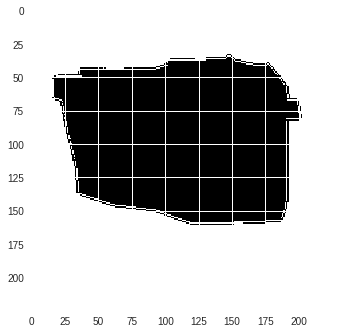

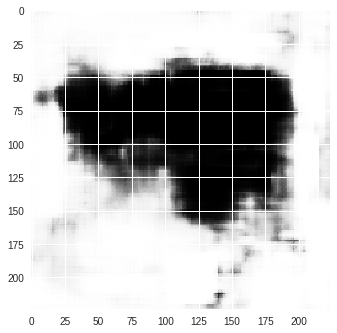

In [0]:
# After training (train set)
img, target = train_data[0]
out = torch.sigmoid(net(img.unsqueeze(0)))

target = target.squeeze(0).detach().numpy()
out = out.squeeze(0).squeeze(0).detach().numpy()

plt.imshow(target)
plt.show()
plt.imshow(out)
plt.show()

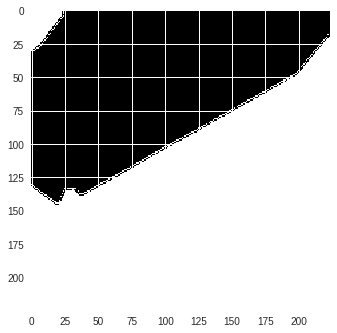

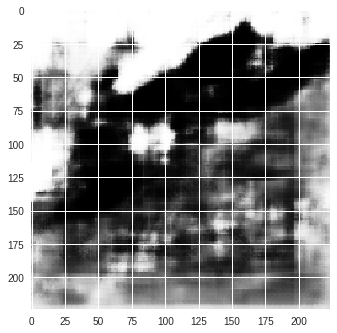

In [0]:
# After training (validation set)
img, target = valid_data[0]
out = torch.sigmoid(net(img.unsqueeze(0)))

target = target.squeeze(0).detach().numpy()
out = out.squeeze(0).squeeze(0).detach().numpy()

plt.imshow(target)
plt.show()
plt.imshow(out)
plt.show()